# 1. Problem Statement & Business Case

 Fashion Class Classification based on convolutional neural network & deep learning 

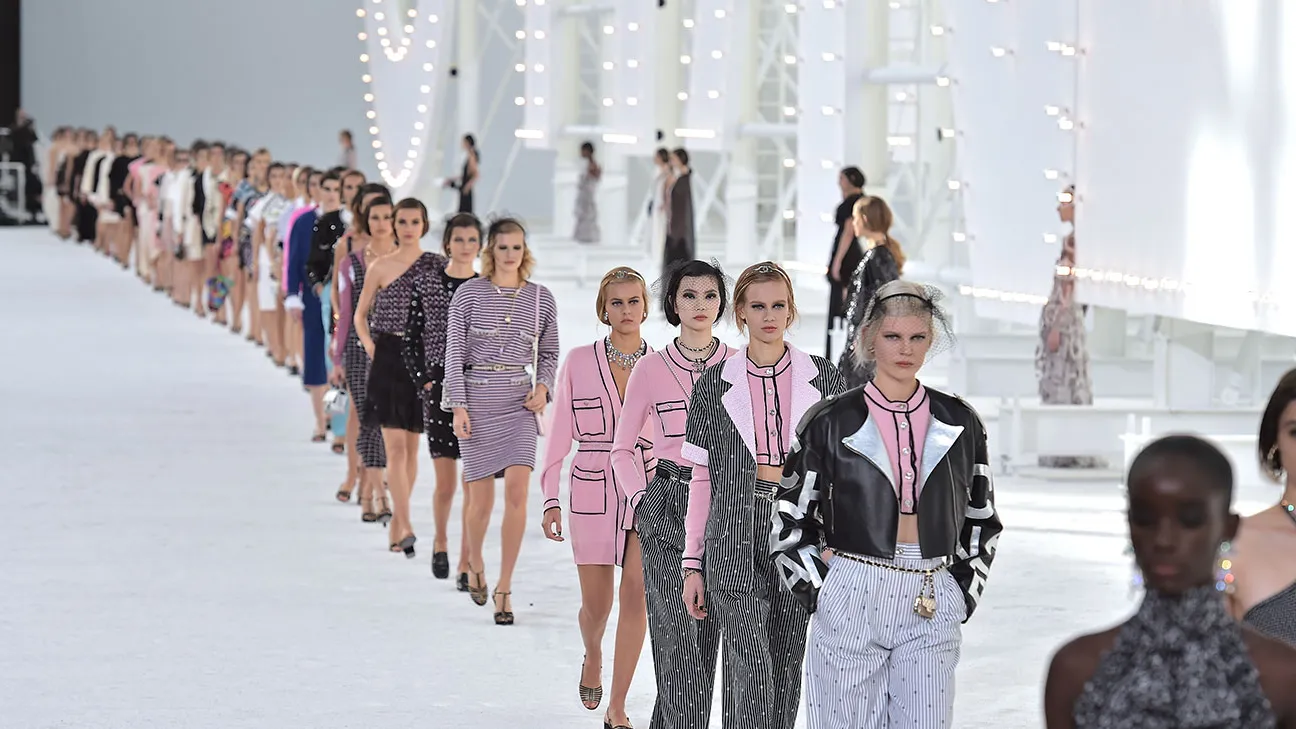

# 2. Importing Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv', sep = ',')

In [5]:
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')

# 3. Visualization of the Dataset

In [6]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [10]:
fashion_train_df.shape

(60000, 785)

In [11]:
fashion_test_df.shape

(10000, 785)

In [12]:
training = np.array(fashion_train_df, dtype = 'float32')

In [13]:
testing = np.array(fashion_test_df, dtype = 'float32')

7.0

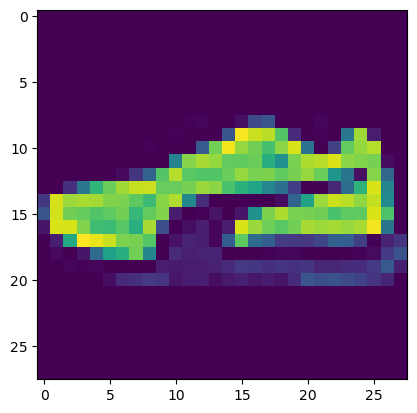

In [14]:
import random
i = random.randint(1, 60000)
plt.imshow(training[i, 1:].reshape(28, 28))
label = training[i, 0]
label

In [15]:
#10 classes decoding is as follows:
#0 --> t-shirt/top
#1 --> trouser
#2 --> pullover
#3 --> dress
#4 --> coat
#5 --> sandal
#6 --> shirt
#7--> sneaker
#8 --> bag
#9 --> ankle boot

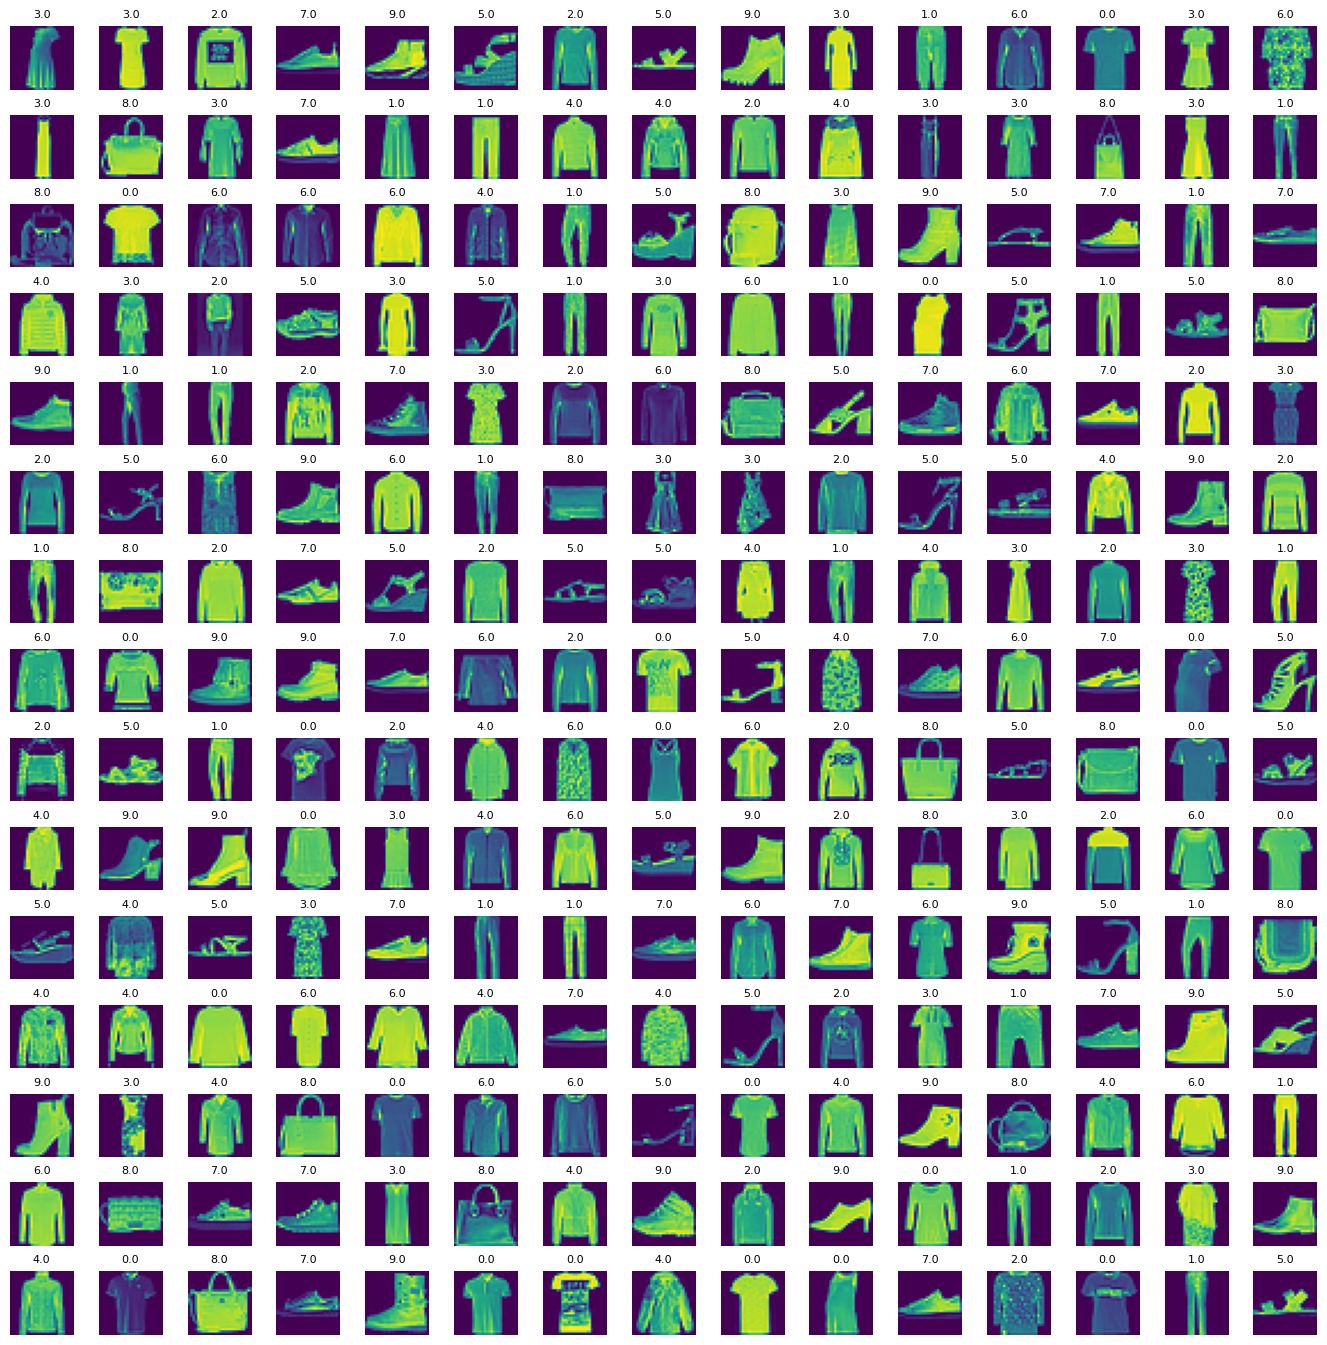

In [16]:
#Let's view more images in a grid format
#Define the dimensions of the plot grid
W_grid = 15
L_grid = 15

#fig, axes = plt.subplots(L_grid, W_grid)
#subplot return the figure object and axes object
#we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() #flaten the 15x15 matrix into 225 array

n_training = len(training) #get the lengh of the training dataset

#Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): #create evenly spaces variables
    #Select a random number
    index = np.random.randint(0, n_training)
    #read and display an image with the selected index
    axes[i].imshow(training[index,1:].reshape(28, 28))
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)    

# 4. Training the model

In [17]:
X_train = training[:, 1:]/255
y_train = training[:, 0]

In [18]:
X_test = testing[:, 1:]/255
y_test = testing[:, 0]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [21]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [22]:
X_train.shape

(48000, 28, 28, 1)

In [23]:
X_test.shape

(10000, 28, 28, 1)

In [24]:
X_validate.shape

(12000, 28, 28, 1)

In [34]:
import keras 

In [35]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout  # Notez la modification ici
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [36]:
cnn_model = Sequential()

In [37]:
cnn_model.add(Conv2D(32, 3, 3, input_shape = (28, 28, 1), activation = 'relu'))

In [39]:
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

In [40]:
cnn_model.add(Flatten())

In [43]:
cnn_model.add(Dense(units=32, activation='relu'))

In [45]:
cnn_model.add(Dense(units=10, activation='sigmoid'))

In [47]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])

In [48]:
epochs = 50

In [51]:
cnn_model.fit(X_train, y_train, batch_size=512, epochs=epochs, verbose=1, validation_data=(X_validate, y_validate))

Epoch 1/50



94/94 [==============================] - 3s 15ms/step - loss: 2.0340 - accuracy: 0.2586 - val_loss: 1.6247 - val_accuracy: 0.4433
Epoch 2/50
94/94 [==============================] - 1s 13ms/step - loss: 1.3586 - accuracy: 0.5685 - val_loss: 1.1492 - val_accuracy: 0.6246
Epoch 3/50
94/94 [==============================] - 1s 12ms/step - loss: 1.0423 - accuracy: 0.6451 - val_loss: 0.9472 - val_accuracy: 0.6637
Epoch 4/50
94/94 [==============================] - 1s 14ms/step - loss: 0.8986 - accuracy: 0.6791 - val_loss: 0.8473 - val_accuracy: 0.6901
Epoch 5/50
94/94 [==============================] - 2s 25ms/step - loss: 0.8184 - accuracy: 0.7026 - val_loss: 0.7901 - val_accuracy: 0.7070
Epoch 6/50
94/94 [==============================] - 3s 28ms/step - loss: 0.7673 - accuracy: 0.7192 - val_loss: 0.7510 - val_accuracy: 0.7176
Epoch 7/50
94/94 [==============================] - 2s 24ms/step - loss: 0.7337 - accuracy: 0.7298 - val_loss: 0.7210 - val_accuracy: 0.7323
Epoch 8/50
94/94 [======

# 5. Evaluating the model

In [52]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.5274 - accuracy: 0.8052
Test Accuracy : 0.805


In [54]:
predicted_probabilities = cnn_model.predict(X_test)
predicted_classes = predicted_probabilities.argmax(axis=-1)

313/313 [==============================] - 1s 2ms/step


In [55]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 2], dtype=int64)

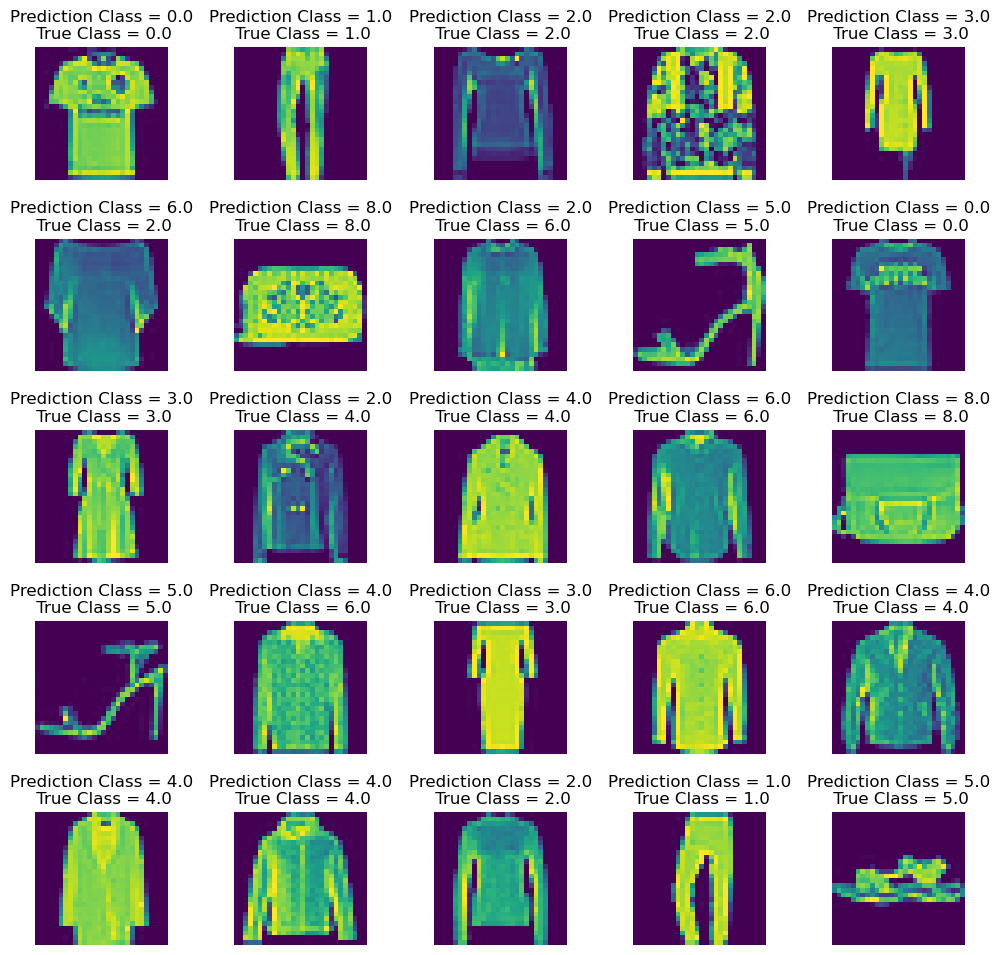

In [57]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i].reshape(28, 28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace = 0.5)

<Axes: >

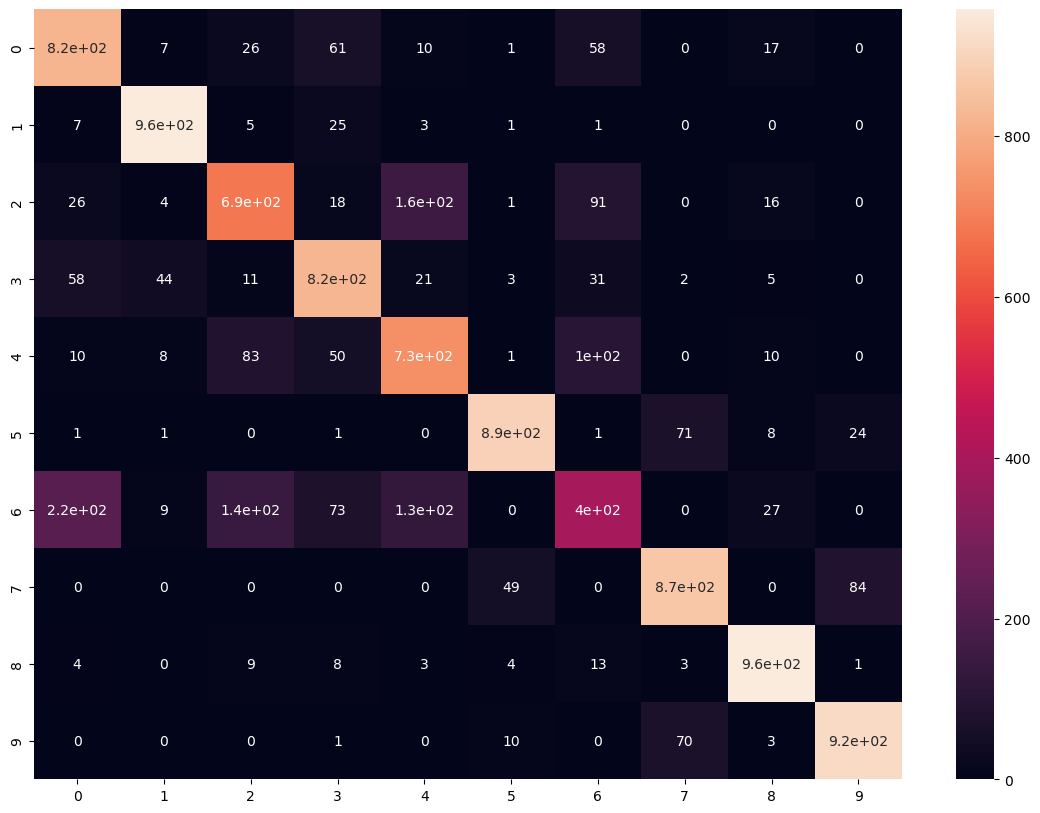

In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot = True)

#Sum the diagonal element ot get the total true correct values

In [60]:
from sklearn.metrics import classification_report
num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.71      0.82      0.76      1000
     Class 1       0.93      0.96      0.94      1000
     Class 2       0.71      0.69      0.70      1000
     Class 3       0.78      0.82      0.80      1000
     Class 4       0.70      0.73      0.71      1000
     Class 5       0.93      0.89      0.91      1000
     Class 6       0.57      0.40      0.47      1000
     Class 7       0.86      0.87      0.86      1000
     Class 8       0.92      0.95      0.94      1000
     Class 9       0.89      0.92      0.90      1000

    accuracy                           0.81     10000
   macro avg       0.80      0.81      0.80     10000
weighted avg       0.80      0.81      0.80     10000



In [ ]:
#10 classes decoding is as follows:
#0 --> t-shirt/top
#1 --> trouser
#2 --> pullover
#3 --> dress
#4 --> coat
#5 --> sandal
#6 --> shirt
#7--> sneaker
#8 --> bag
#9 --> ankle boot